# **Predicting Heart Disease Using Machine Learning**

## Objective

This project aims to develop a machine learning model that can predict the presence of heart disease based on various medical attributes. By leveraging Python-based data science and machine learning libraries, we will analyze patient data, identify key predictors, and evaluate different models to achieve optimal performance.

## Project Workflow Overview

This project follows a structured machine learning workflow, covering key steps from data exploration to model evaluation and reporting.

#### Steps & Objectives

| **Step** | **Description** |
|----------|---------------|
| **Exploratory Data Analysis (EDA)** | Understanding the dataset, identifying patterns, and detecting anomalies. |
| **Model Training** | Creating machine learning models to predict a target variable based on input features. |
| **Model Evaluation** | Assessing model performance using problem-specific evaluation metrics. |
| **Model Comparison** | Testing different models to determine the most effective one. |
| **Model Hyperparameter Tuning** | Optimizing model parameters to improve performance. |
| **Feature Importance** | Identifying which features contribute most to the prediction of heart disease. |
| **Cross-Validation** | Ensuring the model generalizes well to unseen data. |
| **Reporting Findings** | Summarizing insights, visualizations, and key takeaways for stakeholders. |

#### Tools & Libraries Used
To accomplish these tasks, we will use:
- **pandas, NumPy, Matplotlib, and Seaborn** for data analysis and visualization.
- **Scikit-Learn** for machine learning model training, evaluation, and optimization.

By following these steps, we aim to build a **robust, interpretable, and accurate** machine learning model for heart disease prediction.

### **1.1) Problem Definition**

**Given clinical parameters about a patient, can we accurately predict whether they have heart disease?**

*  The problem we are exploring is **binary classification**, meaning each sample belongs to one of two possible categories.

*  In this case, we will use **various clinical features** (such as health characteristics) to predict whether an individual has **heart disease (1) or not (0).**

*  By leveraging machine learning, we aim to develop a model that can assist in early detection and diagnosis, ultimately contributing to better healthcare outcomes.

> we also want to be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

### **1.2) Data Collection & Exploration**
The dataset originates from the [Cleveland](https://archive.ics.uci.edu/ml/datasets/heart+Disease) Heart Disease dataset available in the UCI Machine Learning Repository.

An alternative version is also available on [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original dataset contains 76 attributes, but we will focus on 14 key attributes (features) for our analysis.  

**Key Definitions**
- Attributes / Features – Variables used to predict the target variable (also called independent variables).  
- Target Variable – The outcome we aim to predict (dependent variable).  

**Independent vs. Dependent Variables**
- Independent Variables (Features): A patient’s medical attributes (e.g., age, cholesterol levels, blood pressure).  
- Dependent Variable (Target): Whether or not the patient has heart disease (1 = Yes, 0 = No).  

> Note: Independent variables help us predict the dependent variable.  

By analyzing these features, we aim to build a model that accurately predicts heart disease.


### **1.3) Evaluation**

Defining an evaluation metric early provides a clear objective, though it may evolve over time.

**Initial Goal**

"If we achieve **95% accuracy** in predicting heart disease during the proof of concept, we will pursue this project."

**Refining Over Time**

As the project progresses, we may adjust this metric based on:
- Model performance on unseen data.  
- Business or clinical requirements.  
- Insights from exploratory data analysis.

A well-defined evaluation metric ensures our model remains **effective and reliable**.

### **1.4) Features**

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

**Data Dictionary**

| Feature   | Description |
|-----------|------------|
| **age** | Age in years |
| **sex** | Sex (1 = male; 0 = female) |
| **cp** | Chest pain type: <br> 0 = Typical angina (chest pain related to decreased blood supply to the heart) <br> 1 = Atypical angina (chest pain not related to the heart) <br> 2 = Non-anginal pain (typically esophageal spasms, non-heart related) <br> 3 = Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically a cause for concern. |
| **chol** | Serum cholesterol in mg/dl. <br> Serum = LDL + HDL + 0.2 * triglycerides. <br> Above 200 is a cause for concern. |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false). <br> A value '>126' mg/dL signals diabetes. |
| **restecg** | Resting electrocardiographic results: <br> 0 = Nothing to note <br> 1 = ST-T Wave abnormality (can range from mild symptoms to severe problems, signaling a non-normal heartbeat) <br> 2 = Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber) |
| **thalach** | Maximum heart rate achieved |
| **exang** | Exercise-induced angina (1 = yes; 0 = no) |
| **oldpeak** | ST depression induced by exercise relative to rest. <br> Measures heart stress during exercise; an unhealthy heart will stress more. |
| **slope** | The slope of the peak exercise ST segment: <br> 0 = Upsloping (better heart rate response to exercise, uncommon) <br> 1 = Flat-sloping (minimal change, typical for a healthy heart) <br> 2 = Downsloping (signs of an unhealthy heart) |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy. <br> Colored vessels mean the doctor can see the blood passing through. The more blood movement, the better (no clots). |
| **thal** | Thallium stress test result: <br> 1, 3 = Normal <br> 6 = Fixed defect (used to be a defect but is now stable) <br> 7 = Reversible defect (improper blood movement during exercise) |
| **target** | Presence of heart disease (1 = Yes, 0 = No) (= the predicted attribute) |

> **Note**: No personal identifiable information (PPI) can be found in the dataset.

## **2.Preparing the tools**
To analyze and manipulate data, we will use the following Python libraries:
* 1) pandas for data handling and preprocessing
  2) NumPy for numerical operations
  3) Matplotlib & Seaborn for visualization
  4) Scikit-Learn for machine learning modeling and evaluation

In [1]:
# Data analysis and visualization libraries and regular Exploratory Data Analysis (EDA)
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced visualization
import datetime

# Ensuring our plots appear within the notebook
%matplotlib inline  

# Machine learning models from Scikit-Learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay
)

# Display the last updated timestamp for this notebook
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Display the versions of key libraries used in this project
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-03-21 16:07:18.556480

NumPy version: 1.26.3
pandas version: 2.1.4
matplotlib version: 3.8.0
Scikit-Learn version: 1.2.2


## **3.Loading the Data**

### Storing and Loading Data in Pandas

There are various ways to store tabular data, similar to an Excel spreadsheet. One of the most common formats is **CSV (Comma-Separated Values)**.

### Common Data Formats
- **CSV** – Comma-separated values (most widely used)
- **JSON** – Lightweight format for structured data
- **SQL** – Relational database format
- **Parquet** – Optimized columnar storage for large datasets

### Loading a CSV File in Pandas
Pandas provides a simple way to read CSV files using the `read_csv()` function:


In [2]:
#We are reading the file directly from the github repository, We can also specify the path to the dataset in our local system
url = "https://raw.githubusercontent.com/DanielJose-J/Heart-Disease-Classification-Project/refs/heads/main/heart-disease.csv"
df = pd.read_csv(url) #DataFrame shortened to df
df.shape # (Rows,Columns)

(303, 14)

## **4. Data Exploration (Exploratory Data Analysis - EDA)**

Once the dataset is imported, the next step is **Exploratory Data Analysis (EDA)**.  
EDA helps us **understand the data**, detect patterns, and identify potential issues such as missing values or outliers.

### **Why is EDA Important?**
- Helps build familiarity with the dataset.
- Identifies relationships between variables.
- Detects anomalies, missing values, and potential data quality issues.
- Ensures models are not overfitting or underfitting.

### **Key Questions to Answer in EDA**
1. What questions are we trying to solve?
2. What types of data do we have, and how should we treat them?
3. Are there missing values? How should they be handled?
4. Are there outliers? Do they impact model performance?
5. Can we modify, add, or remove features to improve results?

### **Basic EDA Techniques**- 
**View Sample Data:**  

In [3]:
#display the first five rows of our data
df.head()  # Shows the first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#display the last five rows of our data
df.tail()  # Shows the last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#display 10 random rows of our data
df.sample(10)  # Displays 10 random rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


**Checking Class Balance**

To check how many positive (`1`) and negative (`0`) samples exist in our dataset
The `value_counts()` function allows us to count how often each unique value appears in a categorical column.

In [6]:
# Count the number of positive (1) and negative (0) cases in the target variable
print("Class distribution in the target variable:")
print(df.target.value_counts())

# Display class distribution as percentages
print("\nClass distribution (in %):")
print(df.target.value_counts(normalize=True) * 100)

Class distribution in the target variable:
target
1    165
0    138
Name: count, dtype: int64

Class distribution (in %):
target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


<br>
We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

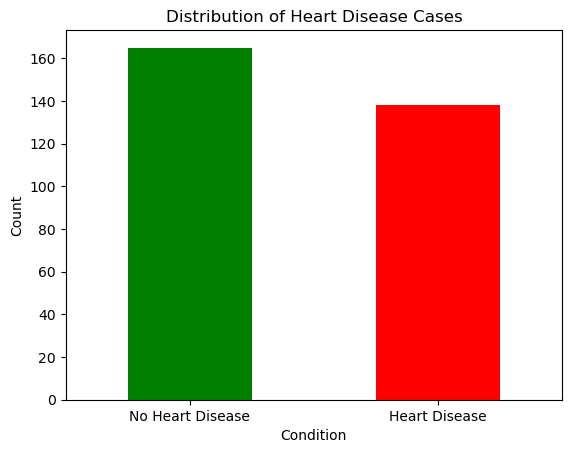

In [7]:
# Plot the target variable distribution as a bar chart
ax = df.target.value_counts().plot(kind="bar", color=["green", "red"])

# Update x-axis labels for better clarity
ax.set_xticklabels(["No Heart Disease", "Heart Disease"], rotation=0)

# Add axis labels and title
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease Cases")

# Show the plot
plt.show()

<br>
`pd.DataFrame.info()` provides a quick overview of the dataset, including the number of missing values and data types.

In our case, all columns are numerical, and there are no missing values.

In [8]:
df.info() #for a quick complete overview of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<br>
Another way to gain quick insights into a DataFrame is by using `pd.DataFrame.describe()`.  

`describe()` provides summary statistics for numerical columns, including:
- **count**: Number of non-null values  
- **mean**: Average value  
- **std**: Standard deviation (spread of data)  
- **min/max**: Minimum and maximum values  
- **25%, 50%, 75%**: Percentiles (quartiles of the data)  

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4.1 Comparing One Feature to Another

To explore how independent variables interact with the target variable, we can use `pd.crosstab(index, columns)`.  

**Comparing Sex with Heart Disease Presence**

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease.

And for sex, 1 = male, 0 = female.

Let's first check the distribution of males and females in our dataset:

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

There are 207 males and 96 females in our study.

Now, let's compare the target column (heart disease presence) with the sex column:

In [11]:
# Cross-tabulation of target vs. sex
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


**Key Observations**  
- **Females (sex = 0)**: 72 out of 96 (~72%) have heart disease.  
- **Males (sex = 1)**: 93 out of 207 (~45%) have heart disease.  
- **Overall Baseline Prediction**:  
  - If we assume **everyone has heart disease**, we'd be correct **62.5%** of the time:  
    ```
    (72 + 93) / 303 = 0.625 (62.5%)
    ```
  - This serves as our **baseline**—a simple heuristic we will aim to outperform using machine learning.

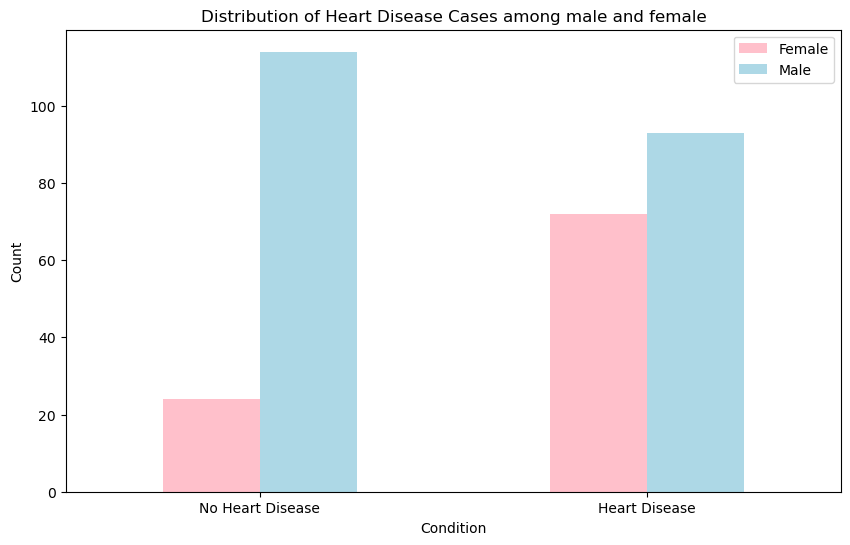

In [12]:
#Create a plot of the crosstab to better understand the distribution and add labels for better comprehension
ax2 = pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["pink","lightblue"])

ax2.set_xticklabels(["No Heart Disease", "Heart Disease"],rotation = 0)

# Add axis labels and title and update legend for better visualization
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease Cases among male and female")
plt.legend(["Female","Male"])

### 4.3 Comparing Age and Maximum Heart Rate  

To explore relationships between independent variables, we can compare **age** and **thalach** (maximum heart rate) against the **target variable (heart disease presence).**  

Since **age** and **thalach** have a wide range of values, a **scatter plot** is ideal for visualizing their distribution.


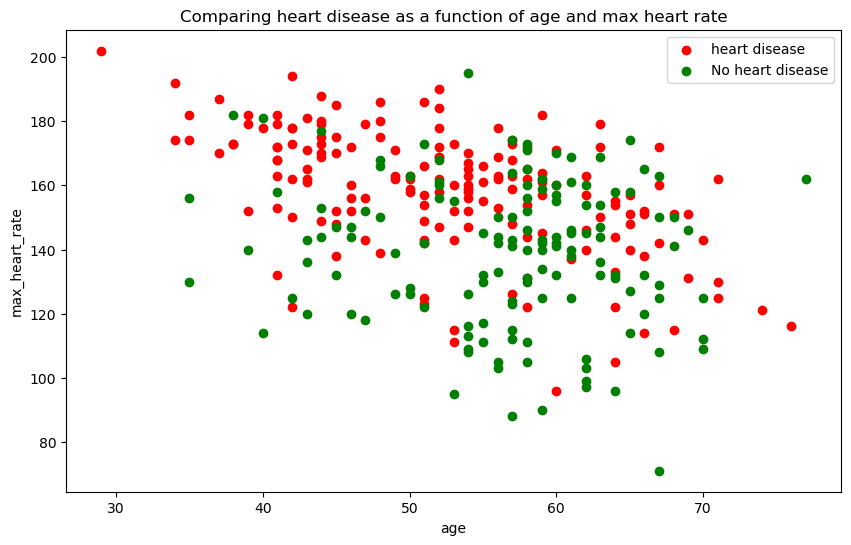

In [13]:
plt.figure(figsize=(10,6))

#Creating a scatterplot for this scenario as we have a wide range of values

#First start with the positive case (heart disease = 1)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red")

#Next we plot the negative cases (heart disease = 0), as we want it on the same plot we use the function again
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="green")

#Add labels and information for better comprehension
plt.xlabel("age")
plt.ylabel("max_heart_rate")
plt.title("Comparing heart disease as a function of age and max heart rate")
plt.legend(["heart disease", "No heart disease"])

**Observations from the Scatter Plot**  

- Younger individuals tend to have higher maximum heart rates (dots are higher on the left side of the graph).  
- There appears to be more heart disease cases in younger individuals (more red/orange dots).  
- These are initial observations, helping us build an understanding of the data before applying machine learning.

**Checking the Age Distribution**  

- Distribution refers to the spread of data how values are distributed across a dataset.  
- Understanding distributions helps in feature engineering and identifying potential biases.

visualizing the **age distribution** in our dataset:

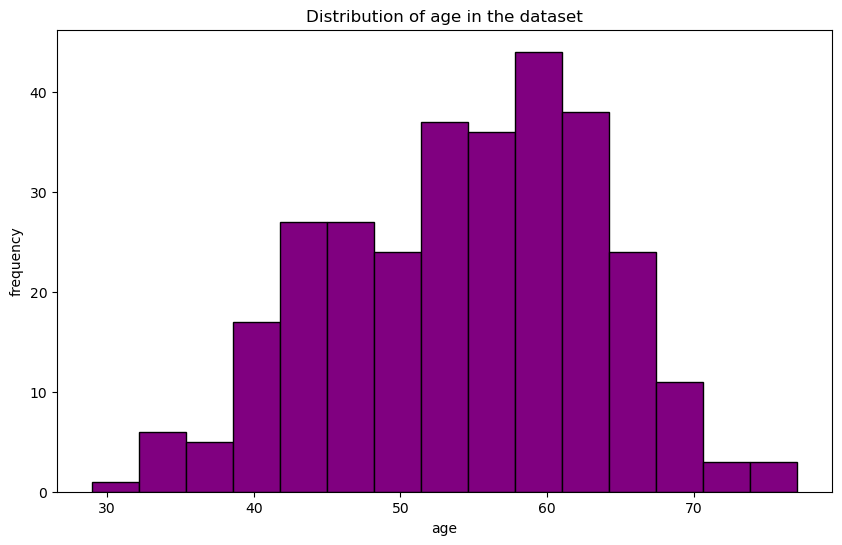

In [14]:
#visualizing the age distribution in our dataset for better comprehension
plt.figure(figsize=(10,6))

#We plot a histogram as it gives a nice distribution of frequency across different groups
plt.hist(df.age, bins=15, edgecolor="black",color="purple")

#Adding labels and titles
plt.title("Distribution of age in the dataset")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

We can observe that the **age distribution follows a normal pattern** but is slightly **right-skewed**.

### 4.4 Comparing Heart Disease Frequency and Chest Pain Type  

Next, we will compare **chest pain type (cp)** with our **target variable (heart disease presence).**  

Since `cp` is a categorical variable, we can analyze its relationship with heart disease using a **cross-tabulation** and a **bar plot**, similar to our previous analysis with sex.

**Chest Pain Type (cp) Categories:**
- **0** = Typical angina (chest pain related to reduced blood supply to the heart)
- **1** = Atypical angina (chest pain not related to the heart)
- **2** = Non-anginal pain (typically esophageal spasms, non-heart related)
- **3** = Asymptomatic (no chest pain but heart disease present)

**Cross-tabulation of Chest Pain Type and Heart Disease**



In [15]:
#finding out the frequency of heartdisease cases in different chest pain types
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


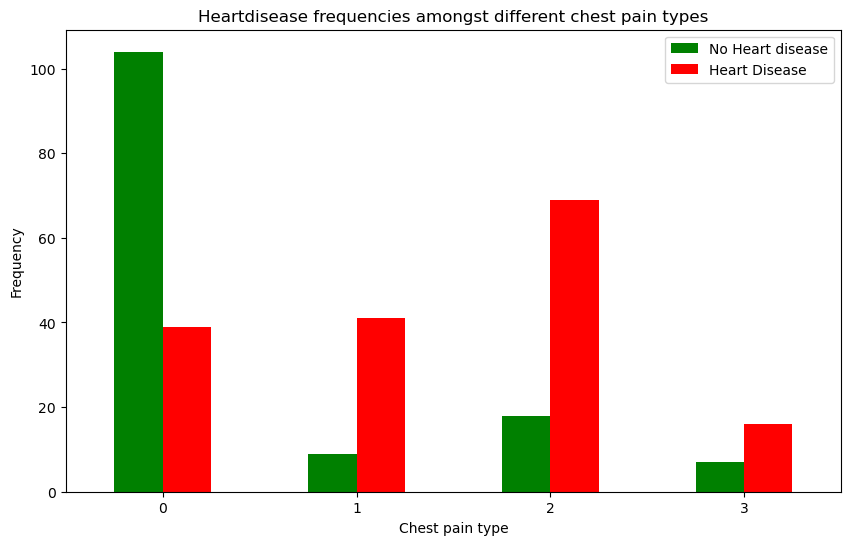

In [16]:
#Plotting heartdisease frequency amongst different types of chest pain for better understanding and visualization
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["green","red"])

#setting the title, label and legend for the plot for better comprehension and visualization
plt.title("Heartdisease frequencies amongst different chest pain types")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(["No Heart disease","Heart Disease"])
plt.xticks(rotation = 0)
plt.show()


  
Interestingly, **atypical angina (cp = 1)**, which is defined as non-heart-related, appears to have a higher ratio of participants with heart disease than those without.  

This raises an important question: What does atypical angina actually mean?   

According to **PubMed**, even some medical professionals find the term ambiguous. A 23-year study suggests that "atypical chest pain" remains widely used but lacks a clear definition, sometimes referring to non-cardiac causes of chest pain.  

While not definitive, this observation suggests **potential inconsistencies in medical terminology** that may be reflected in our dataset.  


### 4.5 Correlation Between Independent Variables  

Examining the correlation between independent variables helps us understand **which features may have a stronger impact on our target variable**.  

To achieve this, we use `pd.DataFrame.corr()`, which generates a **correlation matrix**—a table displaying the relationships between all numerical variables in our dataset.

**Generating the Correlation Matrix**

In [17]:
# Create a correlation matrix and displaying it
corr_matrix = df.corr()
corr_matrix


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Correlation Matrix of Features')

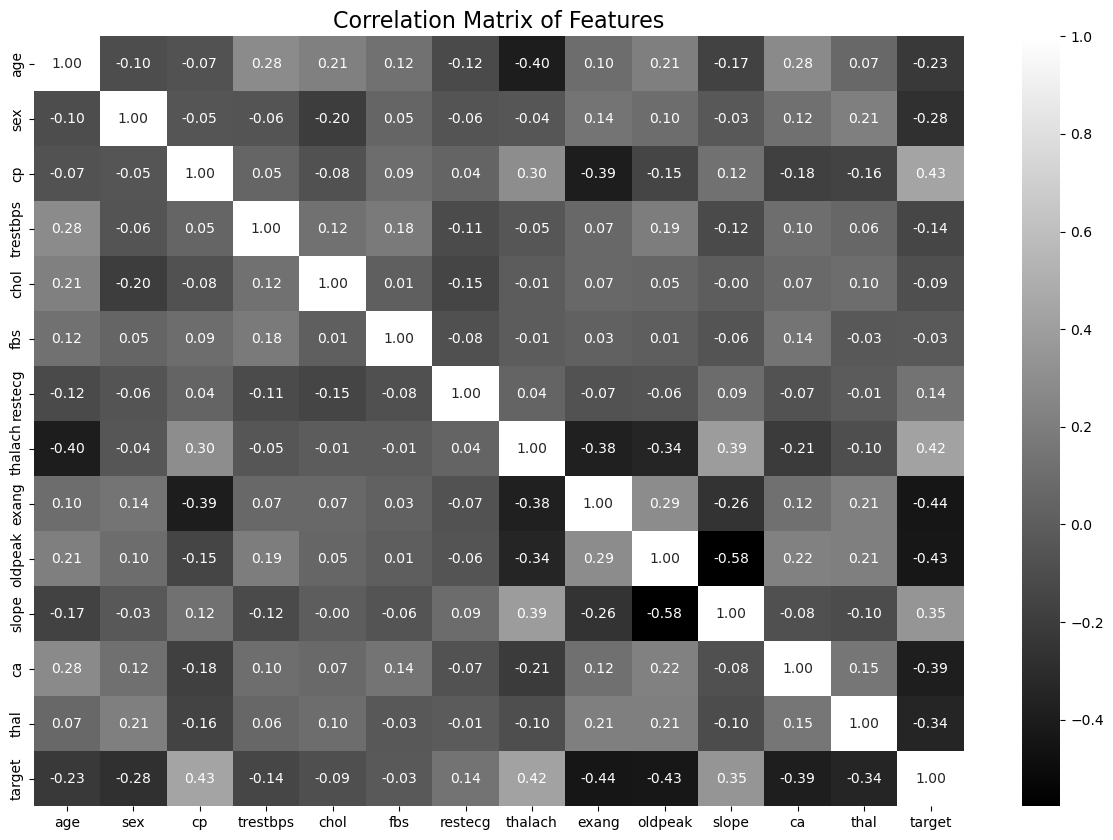

In [18]:
#For better comprehension we can visualize the correlation matrix using seaborn module
plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix,cmap="gray",annot=True,fmt=".2f")

#set the labels and title 
plt.title("Correlation Matrix of Features",fontsize=16)

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

### 4.6 Model Driven EDA 

EDA helps us build an intuition about the dataset. So far, we've identified a baseline estimate using sex, but other variables require further analysis.  

**Common Data Insights to Explore**
- **Distributions:** Understanding how data is spread.  
- **Missing Values:** Identifying gaps that may affect model performance.  
- **Outliers:** Detecting extreme values that could skew results.  

Rather than manually exploring every variable, we will use machine learning models to **guide further analysis**, identify important features, and refine our approach for better predictions.  


## **5. Modeling**  

Now that we've explored the data, it's time to build a **machine learning model** to predict our **target variable** using the 13 independent variables.  

**Problem Statement Recap**  
Can we predict whether a patient has heart disease based on clinical parameters?  

**Evaluation Metric Recap**  
To proceed with this project, we aim to achieve **95% accuracy** in our predictions during the proof of concept.  

**Next Steps: Preparing the Data**  
Before building a model, we need to ensure our dataset is properly structured, cleaned, and ready for training. Let's take a final look at the data before proceeding.  


In [19]:
#Retake a look at the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


To build our model, we need to separate the **target variable** from the **features**.  

**Data Splitting Approach**  
- **X (Features):** All variables **except** the target variable.  
- **y (Target):** The target variable, extracted as a NumPy array for compatibility with machine learning models.  

This step ensures that our model learns patterns from the **independent variables (features)** while predicting the **dependent variable (target: heart disease presence)**


In [20]:
#Splitting the data into features(X) and label(y)

#Take everything except the target variable in X
X = df.drop("target",axis=1)

#Only take the target variable in y
y = df.target.to_numpy()

<br>
checking the new variables in X and y

In [21]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
# Targets (in the form of a NumPy array)
print(y, type(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0] <class 'numpy.ndarray'>


### 5.1 Creating a Training and Test Split  

One of the most important steps in machine learning is **splitting the data** into a **training set** and a **test set**.  

**Why Split the Data?**  
- The **training set** is used to teach the model to recognize patterns.  
- The **test set** is used to evaluate how well the model generalizes to unseen data.  
- Ensuring that the test data is completely separate from training data helps assess real-world performance.  

**Typical Split Ratios**  
- **Training set (70-80%)** → The model learns from this data.  
- **Test set (20-30%)** → The model is evaluated on unseen data.

Splitting the data correctly ensures our model is evaluated fairly and can generalize to new data when deployed.

In [23]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits). Which will help with consistency in results
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X, #The features data
                                                 y, #The target data
                                                 test_size = 0.2) #80% is used for training and 20% is used for testing



Examining the training data

In [24]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [25]:
print(y_train, len(y_train))
print()
print(f'We are using {len(y_train)} samples to train our model')

[1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1] 242

We are using 242 samples to train our model


<br>
Examining the test data

In [26]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [27]:
print(y_test, len(y_test))
print()
print(f'We are using {len(y_test)} samples to test our model')

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0] 61

We are using 61 samples to test our model


### 5.2 Selecting Machine Learning Models  

With our data prepared, we are now ready to train our first models as part of this project.  

**Model Selection Approach**  
Rather than testing every possible algorithm, we will start by experimenting with a few well-known models and evaluate their performance.  

As a first step, we will train and compare the following models:  

- **Logistic Regression** (`sklearn.linear_model.LogisticRegression`)  
  - A commonly used baseline model for binary classification.  
- **K-Nearest Neighbors (KNN)** (`sklearn.neighbors.KNeighborsClassifier`)  
  - A distance-based algorithm that predicts a sample’s class based on its nearest neighbors.  
- **Random Forest** (`sklearn.ensemble.RandomForestClassifier`)  
  - An ensemble learning model that leverages multiple decision trees for improved accuracy.

**Why These Models?**

Since our task is **binary classification**, we follow Scikit-Learn's model selection guidelines and start with:  

- **Logistic Regression** – A simple, interpretable baseline.  
- **K-Nearest Neighbors (KNN)** – A distance-based method.  
- **Random Forest** – A powerful ensemble model.  

These models provide a balance of **simplicity, interpretability, and accuracy**, allowing us to establish a baseline before exploring more complex algorithms.

Below is the scikit-Learn roadmap that has been utilized for selecting the models.




**Consistent API Across Scikit-Learn Models**  

Most Scikit-Learn models share a similar API:  
- **Training:** `model.fit(X_train, y_train)`  
- **Scoring:** `model.score(X_test, y_test)` (returns accuracy for classification models)  

Since our chosen models follow this structure, we can store them in a dictionary and create a function to train and evaluate them efficiently.


In [28]:
# Creating a dictionary to store the various models
models = {
    "LogisticRegression":LogisticRegression(max_iter=1000),#max_iter parameter set to 1000 due to warning
    "KNeighborsClassifier":KNeighborsClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42) # for reproducible results
    model_scores = {} # dictionary for storing our model scores for later evaluation
    
    #Create a loop and evaluate each model and store its score
    for name,model in models.items(): # for key,value pair in the dictionary models instantiated above
        model.fit(X_train,y_train)#training the model
        model_scores[name] = model.score(X_test,y_test) # storing the model score in model_scores dict. with the name given in models. as loop runs the model/name changes

    return model_scores


In [29]:
#Calling the model_scores function to evaluate our models
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
#printing the scores in model_scores
for name,score in model_scores.items():
    print(f"{name} : {score}")

LogisticRegression : 0.8688524590163934
KNeighborsClassifier : 0.6885245901639344
RandomForestClassifier : 0.8360655737704918


# 5.3 Comparing the Results of Several Models  

Now that we have saved our model scores in a dictionary (`model_scores`), we can compare their performance visually by converting them into a DataFrame and plotting a bar chart.

In [30]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])#as the models default scoring is accuracy we give accuracy
model_compare.T

,accuracy
LogisticRegression,0.868852
KNeighborsClassifier,0.688525
RandomForestClassifier,0.836066


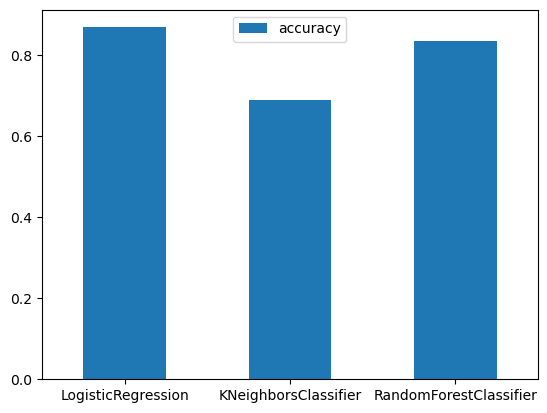

In [31]:
#using pandas to plot plot the data visually
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

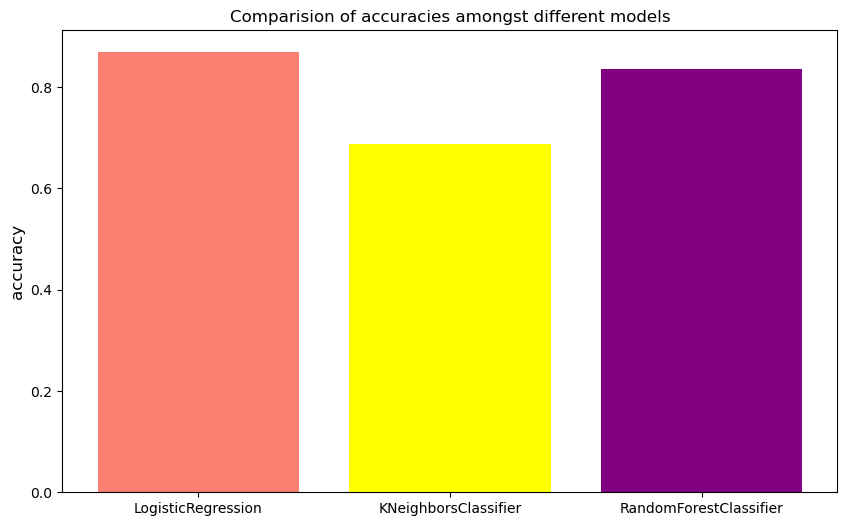

In [32]:
#Visual representation using matplotlib for better comprehension

plt.figure(figsize=(10,6)) #setting the plotting function

plt.bar(model_compare.T.index,model_compare.T["accuracy"],color = ["salmon","yellow","purple"])

#set the labels title legend and axes
plt.title("Comparision of accuracies amongst different models")
plt.ylabel("accuracy",fontsize=12)
plt.xticks(rotation = 0)

plt.show()

## 5.4 Presenting Our Best Model & Key ML Concepts  

Before finalizing our best model, let's understand a few important machine learning terms that will help improve our model performance and evaluation.

**Key Concepts in Model Evaluation & Optimization**  

| **Term**                  | **Definition** |
|---------------------------|--------------|
| **Hyperparameter Tuning** | Adjusting model settings (hyperparameters) to improve performance. Helps optimize accuracy, recall, precision, etc. |
| **Feature Importance**    | Determines which features (variables) contribute most to predictions. Helps in feature selection. |
| **Confusion Matrix**      | A table comparing predicted vs. actual values. If predictions are perfect, values align diagonally (top-left to bottom-right). |
| **Cross-Validation**      | Splits data into multiple train-test sets to ensure model evaluation is robust and not dependent on a single data split. |
| **Precision**            | Measures the proportion of true positives over total predicted positives. Higher precision means fewer false positives. |
| **Recall**               | Measures the proportion of true positives over all actual positives. Higher recall means fewer false negatives. |
| **F1 Score**             | The harmonic mean of precision and recall. Balances both metrics into one score (1 = best, 0 = worst). |
| **Classification Report** | A built-in `sklearn` function that summarizes key classification metrics like precision, recall, and F1-score. |
| **ROC Curve**            | A plot showing the trade-off between true positive rate and false positive rate. A perfect model follows the left and top border. |
| **Area Under Curve (AUC)** | Measures the area under the ROC curve. A score of 1.0 means a perfect model. |

---
**Next Steps**  
We'll explore these concepts further as we refine our model and evaluate its performance.  

## **6. Hyperparameter Tuning and Cross-Validation**  

Machine learning models, like recipes, can perform differently based on their settings (hyperparameters). Adjusting these settings can improve performance but may also lead to overfitting if tuned too aggressively. Our goal is to find a balanced model that performs well on both training and unseen data.

**Why Cross-Validation?**  
Instead of relying on a single train-test split, we use **k-fold cross-validation**, which:
- Splits the data into **k different subsets (folds)**.
- Trains and tests the model on each fold.
- Averages the results to get a more robust performance estimate.

This prevents **bias from a single data split** and ensures the model generalizes well.

### **Project Plan:**  
1. **Tune hyperparameters** to find the best model settings.  
2. **Perform cross-validation** for more reliable evaluation.  
3. **Plot ROC curves** to visualize model performance.  
4. **Create a confusion matrix** to analyze predictions.  
5. **Calculate precision, recall, and F1-score** for better evaluation.  
6. **Identify important features** influencing predictions.  

By following this structured approach, we ensure that our final model is both **optimized and generalizable**.  


### 6.1 Tuning `KNeighborsClassifier` (KNN)  

The **K-Nearest Neighbors (KNN)** algorithm classifies a sample based on its closest neighbors. The key hyperparameter **`n_neighbors`** controls how many neighbors are considered for classification.  

**Why Tune `n_neighbors`?**  
- The default is **`n_neighbors=5`**, but adjusting this can improve accuracy.  
- **Too low** → Model may be too sensitive (overfitting).  
- **Too high** → Model may generalize too much (underfitting).  

**Next Steps:**  
- Test different values of **`n_neighbors`**.  
- Compare accuracy to find the best setting.  


In [33]:
#Create a list of train scores
train_scores = []

#Create a list of test scores
test_scores = []

#Create a list for neighbors parameters, default is 5
neighbors = range(1,21)

#instantiate the KNN model
KNN = KNeighborsClassifier()

#create a loop to fit the neighbors values to the model

for i in neighbors:
    KNN.set_params(n_neighbors=i)

    KNN.fit(X_train,y_train)#fitting the model with the train_values
    
    train_scores.append(KNN.score(X_train,y_train))
    test_scores.append(KNN.score(X_test,y_test))



In [34]:
#checking the values for train scores
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
#checking the values for test scores
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

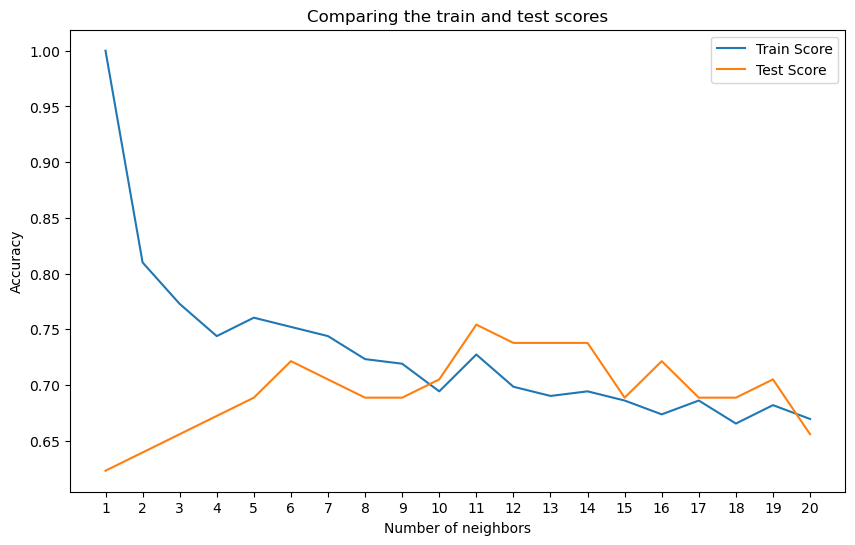

The maximum accuracy for the KNN model is : 75.41%, Max number of neighbors : 11


In [36]:
plt.figure(figsize=(10,6))
#plt.plot() by default plots a line plot
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")

#setting the title and labels
plt.title("Comparing the train and test scores")
plt.legend()
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")

plt.show()

#printing the maximum score value
print(f"The maximum accuracy for the KNN model is : {max(test_scores)*100:.2f}%, Max number of neighbors : {test_scores.index(max(test_scores))+1}")

From our graph, **`n_neighbors=11`** gave the best performance for KNN.  
However, KNN still underperformed compared to **Logistic Regression** and **Random Forest**.  

**Next Steps: Hyperparameter Tuning**  
Instead of manually tuning, we'll use **`RandomizedSearchCV`** to:  
- Automatically test multiple hyperparameter combinations.  
- Evaluate and select the best-performing settings.  

We'll now apply this to Logistic Regression and Random Forest to optimize their performance.  


### 6.2 Tuning Models with `RandomizedSearchCV`  

Both **Logistic Regression** and **Random Forest** have multiple hyperparameters that can be tuned to improve performance.  

**Approach**  
1. Define a hyperparameter grid (a dictionary of hyperparameters).  
2. Use **`RandomizedSearchCV`** to test different combinations.  
3. Identify the best hyperparameters for each model.  

> **Note:** Ensure hyperparameter dictionary keys match the exact parameter names in Scikit-Learn to avoid errors.  

We'll now set up and run the tuning process. 


In [37]:
#Creating a hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20), #C is like a control parameter that tells how much the model should learn from the training data.
                                        #Small C means dont learn too much , large C means its like byhearting the training data
               "solver":["liblinear"]}

#Creating a hyperparameter grid for RandomForest
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }


In [38]:
%%time

#instantiate a random seed
np.random.seed(42)
#Using randomizedsearchCV for creating models
log_reg_rs = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
#fit the training data to the model
log_reg_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 371 ms, sys: 5.48 ms, total: 376 ms
Wall time: 128 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
log_reg_rs.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier

In [41]:
%%time

#instantiate a random seed
np.random.seed(42)

#Using randomizedsearchCV to create models
rf_rs = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
#fit the training data to the model
rf_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 20 s, sys: 173 ms, total: 20.2 s
Wall time: 20.3 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
#Finding the best parameters
rf_rs.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
rf_rs.score(X_test,y_test)

0.8688524590163934

### 6.3 Tuning a Model with `GridSearchCV`  

**What’s the Difference?**  
- **`RandomizedSearchCV`**: Tries a random selection of hyperparameter combinations (faster, good for large search spaces).  
- **`GridSearchCV`**: Tries **every possible combination** in the hyperparameter grid (more thorough, but slower).  

Both methods automatically evaluate combinations and **return the best-performing model**.

---

We'll now use `GridSearchCV` to perform an exhaustive hyperparameter search and see which combination gives us the best results.


In [47]:
#Since logistic regression is doing better we are doing grid searchcv on it to enhance its performance

#Creating a hyperparameter grid for logistic regression
log_reg_gridsearch_grid = {"C":np.logspace(-4,4,35), 
               "solver":["liblinear"]}

#instantiate a random seed
np.random.seed(42)

#Using randomizedsearchCV to create models
log_reg_gs = GridSearchCV(LogisticRegression(),param_grid=log_reg_gridsearch_grid,cv=5,verbose=True)
#fit the training data to the model
log_reg_gs.fit(X_train,y_train)


Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.71907220e-04, 2.95520924e-04, 5.08021805e-04,
       8.73326162e-04, 1.50131073e-03, 2.58086154e-03, 4.43668733e-03,
       7.62698586e-03, 1.31113394e-02, 2.25393390e-02, 3.87467512e-02,
       6.66084629e-02, 1.14504757e-01, 1.96841945e-01, 3.38385515e-01,
       5.81709133e-01, 1.00000000e+00, 1.71907220e+00, 2.95520924e+00,
       5.08021805e+00, 8.73326162e+00, 1.50131073e+01, 2.58086154e+01,
       4.43668733e+01, 7.62698586e+01, 1.31113394e+02, 2.25393390e+02,
       3.87467512e+02, 6.66084629e+02, 1.14504757e+03, 1.96841945e+03,
       3.38385515e+03, 5.81709133e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
#finding the best parameters
log_reg_gs.best_params_

{'C': 0.19684194472866112, 'solver': 'liblinear'}

In [49]:
#evaluating the score
log_reg_gs.score(X_test,y_test)

0.8852459016393442

In this case, we got the same results as before since our grid only has a maximum of 35 different hyperparameter combinations


## 7. Evaluating a Classification Model (Beyond Accuracy)

Now that we’ve tuned our model, let’s evaluate it using additional performance metrics.

**Key Metrics & Scikit-Learn Methods**

| **Metric**              | **Scikit-Learn Function**                                   |
|-------------------------|-------------------------------------------------------------|
| ROC Curve & AUC Score   | `sklearn.metrics.RocCurveDisplay()` *(v1.2+)*               |
| Confusion Matrix        | `sklearn.metrics.confusion_matrix()`                        |
| Classification Report   | `sklearn.metrics.classification_report()`                   |
| Precision               | `sklearn.metrics.precision_score()`                         |
| Recall                  | `sklearn.metrics.recall_score()`                            |
| F1-Score                | `sklearn.metrics.f1_score()`                                |

These metrics help us understand how well our model performs, especially in cases where accuracy alone isn’t enough.

**Next Step**

We’ll make predictions on the test set using:
```python
model.predict(X_test)


In [50]:
#predicting the values using X_test data
y_preds = log_reg_gs.predict(X_test)

In [51]:
#verifying the predictions
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### 7.1 ROC Curve and AUC Score

The **ROC curve** (Receiver Operating Characteristic) helps us evaluate how well our model separates the classes by comparing the **true positive rate** vs the **false positive rate**.

**Real-World Analogy**
In medical testing:
- A **false positive** means the test says someone has a disease when they don’t.
- A **false negative** means the test misses the disease when the person actually has it.

**How to Plot the ROC Curve in Scikit-Learn**
We’ll use:
```python
sklearn.metrics.RocCurveDisplay.from_estimator(estimator, X, y)


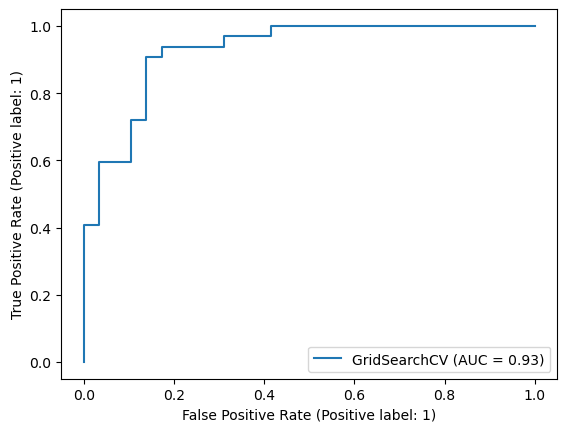

In [55]:
#importing the ROC Curve display
from sklearn.metrics import RocCurveDisplay

#plotting the ROC Curve
RocCurveDisplay.from_estimator(estimator = log_reg_gs,
                               X = X_test,
                               y = y_test)
                       

### 7.2 Confusion Matrix

Our ROC curve shows that the model performs **much better than random guessing** (AUC = 0.5), which is great.  
However, since a **perfect model would score an AUC of 1.0**, there's still room for improvement.


Now, let's move on to the **confusion matrix**, another powerful way to evaluate classification performance.

A confusion matrix shows:
- **True Positives (TP)**: Correctly predicted positives  
- **True Negatives (TN)**: Correctly predicted negatives  
- **False Positives (FP)**: Incorrectly predicted positives  
- **False Negatives (FN)**: Incorrectly predicted negatives  

This helps us see **exactly where our model is getting things right or wrong**.


### 7.2 Creating a Confusion Matrix

A **confusion matrix** is a visual tool to understand **where your model made correct and incorrect predictions** — in other words, where it got "confused."


**Scikit-Learn Function**  
We can create one using:
```python
sklearn.metrics.confusion_matrix(y_true, y_pred)


In [57]:
#Display the confusion matrix
print(confusion_matrix(y_test,y_preds))|

[[25  4]
 [ 3 29]]


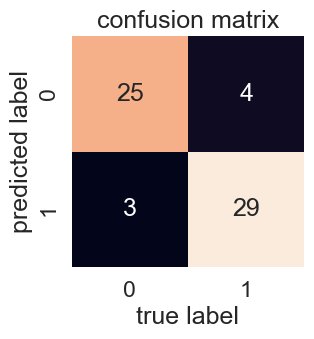

In [60]:
import seaborn as sns

sns.set(font_scale=1.5) # increasing the font size

def plot_conf_matrix(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     cbar = False,
                     annot = True)

    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.title("confusion matrix")
    plt.show()


#calling the function
plot_conf_matrix(y_test,y_preds)             
    

**Interpreting the Confusion Matrix**

From the confusion matrix, we can see the model makes **similar numbers of mistakes** in both classes:

- **4 false negatives**: The model predicted **0** when the true label was **1** (missed actual positive cases).  
- **3 false positives**: The model predicted **1** when the true label was **0** (flagged negatives as positives).


As further analysis, we could **inspect these specific cases** to understand why the model got them wrong — possibly due to unclear patterns or overlapping features in the


### 7.3 Classification Report

A **classification report** summarizes key evaluation metrics for each class.

We can generate one using:  
```python
sklearn.metrics.classification_report(y_true, y_pred)


In [62]:
#displaying a classification report
print(classification_report(y_true = y_test,
                            y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### 7.4 Understanding Classification Metrics  

what each metric in the **classification report** means:

| **Metric**       | **Explanation** |
|------------------|-----------------|
| **Precision**    | Of the samples the model predicted as positive (class 1), how many were actually correct. |
| **Recall**       | Of all actual positives, how many did the model correctly identify. |
| **F1 Score**     | The balance between precision and recall. 1.0 is perfect. |
| **Support**      | The number of actual samples in each class. |
| **Accuracy**     | Overall correctness of the model (correct predictions / total samples). |
| **Macro Avg**    | Average of precision, recall, and F1 across classes (treats all classes equally). |
| **Weighted Avg** | Like macro, but considers class sizes. Favors performance on the larger class. |


While these results give us good insight, they were based on a **single train-test split**. To make our evaluation more **robust**, we'll now use **cross-validation**.


### **Next Step: Cross-Validation**
We'll use:
```python
cross_val_score(estimator, X, y, scoring="metric", cv=5)


In [63]:
#checking the best parameters
log_reg_gs.best_params_

{'C': 0.19684194472866112, 'solver': 'liblinear'}

In [66]:
#import cross val score
from sklearn.model_selection import cross_val_score

#creating a new model with the best parameters
new_log_reg = LogisticRegression(C=0.19684194472866112,
                                 solver = 'liblinear')

In [79]:
%%time

# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(new_log_reg,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy")) # accuracy as scoring
cv_acc

CPU times: user 9.75 ms, sys: 9.87 ms, total: 19.6 ms
Wall time: 34.5 ms


0.8446994535519124

In [70]:
#cross-validated precision score
cv_precision = np.mean(cross_val_score(new_log_reg,
                                       X,
                                       y,
                                       cv=5,
                                       scoring = "precision"))

cv_precision

0.8207936507936507

In [71]:
#cross-validated recall score
cv_recall = np.mean(cross_val_score(new_log_reg,
                                       X,
                                       y,
                                       cv=5,
                                       scoring = "recall"))

cv_recall

0.9212121212121213

In [74]:
#cross-validated f1score
cv_f1 = np.mean(cross_val_score(new_log_reg,
                                       X,
                                       y,
                                       cv=5,
                                       scoring = "f1"))

cv_f1

0.8673007976269721

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

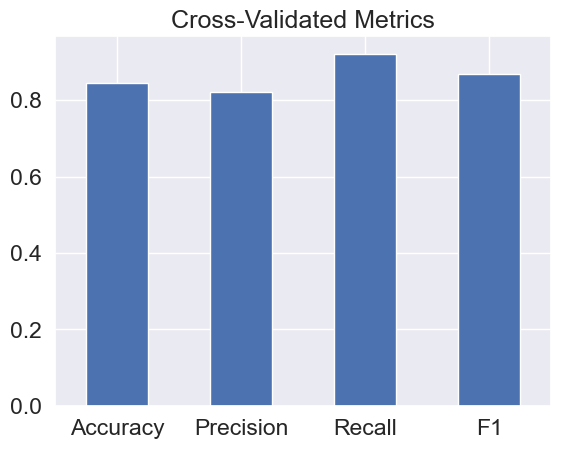

In [93]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": [cv_acc],
                            "Precision": [cv_precision],
                            "Recall": [cv_recall],
                            "F1": [cv_f1]})
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.xticks(rotation = 0)


## 8. Feature Importance

**Feature importance** helps us understand **which input features (variables)** contribute most to a model’s predictions.

In our case, it answers:
> “Which medical characteristics most influence whether the model predicts heart disease?”

---

**Key Points:**
- Different models calculate feature importance **in different ways**.
- Feature importance from one model **may not match** another.
- You can usually check model-specific importance in the **Scikit-Learn documentation** or search for `"model_name feature importance"`.

---

**For Logistic Regression:
- Feature importance is accessed through the `.coef_` attribute.
- These coefficients represent the **weight or influence** of each feature.
- A **larger absolute value** means a **stronger influence** on the prediction.

We’ll now use `.coef_` to visualize which features are most important in predicting heart disease using our Logistic Regression model.


In [85]:
# Fit an instance of LogisticRegression (taken from above)
new_log_reg.fit(X_train, y_train);
# Check coef_
new_log_reg.coef_

array([[ 0.00301385, -0.84679847,  0.65659649, -0.01157383, -0.00165059,
         0.04275513,  0.30847782,  0.02454609, -0.59569578, -0.56660772,
         0.44494371, -0.63273024, -0.67209447]])

In [87]:
# Match features to columns
features_dict = dict(zip(df.columns, list(new_log_reg.coef_[0])))
features_dict

{'age': 0.0030138500647255663,
 'sex': -0.8467984713325387,
 'cp': 0.6565964852311285,
 'trestbps': -0.01157382624519891,
 'chol': -0.0016505909252360217,
 'fbs': 0.04275512522024201,
 'restecg': 0.30847781527715684,
 'thalach': 0.02454609200667511,
 'exang': -0.5956957819015555,
 'oldpeak': -0.5666077246702194,
 'slope': 0.4449437145794037,
 'ca': -0.6327302364571188,
 'thal': -0.6720944658004167}

<module 'matplotlib.pyplot' from '/Users/daniel/Desktop/env/lib/python3.11/site-packages/matplotlib/pyplot.py'>

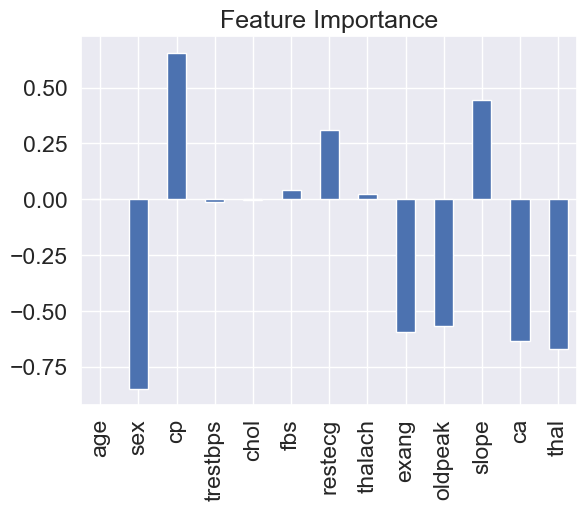

In [96]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Interpreting Logistic Regression Coefficients

In Logistic Regression, the **larger the coefficient (positive or negative)**, the more influence that feature has on the model's decision.

- **Positive values** → Feature increases the likelihood of predicting heart disease (target = 1).  
- **Negative values** → Feature decreases the likelihood of predicting heart disease.

For example:
- The `sex` feature has a coefficient of **-0.904**, meaning as `sex` increases (from 0 to 1), the model is more likely to predict **no heart disease**.
- This reflects a **negative correlation** between being male (`sex = 1`) and the model predicting heart disease.

You can confirm this relationship by visually comparing the `sex` and `target` columns in the dataset.


In [97]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Looking at the data:

- When `sex = 0` (female):  
  - **72 out of 96** females have heart disease.  
  - That’s about **3 times more** with heart disease than without (72 vs. 24).

- When `sex = 1` (male):  
  - The numbers are **more balanced** — 114 without vs. 93 with heart disease.

---

**What Does This Mean?**

The model has **picked up this pattern** in the data:  
- **Females** in this dataset are **more likely** to have heart disease.  
- This is reflected by the **negative coefficient for `sex`**, meaning as the `sex` value increases (from 0 to 1), the **probability of heart disease decreases**.

This is how Logistic Regression **learns patterns** — by assigning weights (positive or negative) based on how each feature correlates with the target.

---

**Next: Positive Correlation?**

Let’s now look at a feature with a **positive coefficient** — which means:  
> As the feature increases, the likelihood of heart disease **also increases**.


In [98]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107



Referring to the data dictionary, `slope` represents the **slope of the peak exercise ST segment**:
- **0** = Upsloping (uncommon, usually healthier)
- **1** = Flatsloping (typical)
- **2** = Downsloping (linked to heart issues)

Our model assigned `slope` a **positive correlation of 0.470** — not as strong as `sex`, but still meaningful.

---
A **positive coefficient** means:
> As `slope` increases, so does the model’s likelihood of predicting heart disease.

This is confirmed by:
```python
pd.crosstab(df["slope"], df["target"])
